In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,recall_score,precision_score
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def get_results(acc_list,auc_list,recall_list,precision_list):    
    acc_list = np.array(acc_list)
    auc_list = np.array(auc_list)
    recall_list = np.array(recall_list)
    precision_list = np.array(precision_list)
    print(f'Recall, Average:{recall_list.mean():.4f}, Std:{recall_list.std():.4f}')
    print(f'precision, Average:{precision_list.mean():.4f}, Std:{precision_list.std():.4f}')
    print(f'Accuracy, Average:{acc_list.mean():.4f}, Std:{acc_list.std():.4f}')
    print(f'AUC, Average:{auc_list.mean():.4f}, Std:{auc_list.std():.4f}')

In [23]:
data = pd.read_csv('diabetes.csv')
# data = data.drop(columns='glucose')
kf = KFold(n_splits=5, shuffle=True, random_state=42)

folds = []
for fold, (train_idx, val_idx) in enumerate(kf.split(data)):
    train_data = data.iloc[train_idx]
    val_data = data.iloc[val_idx]
    folds.append((train_data, val_data))

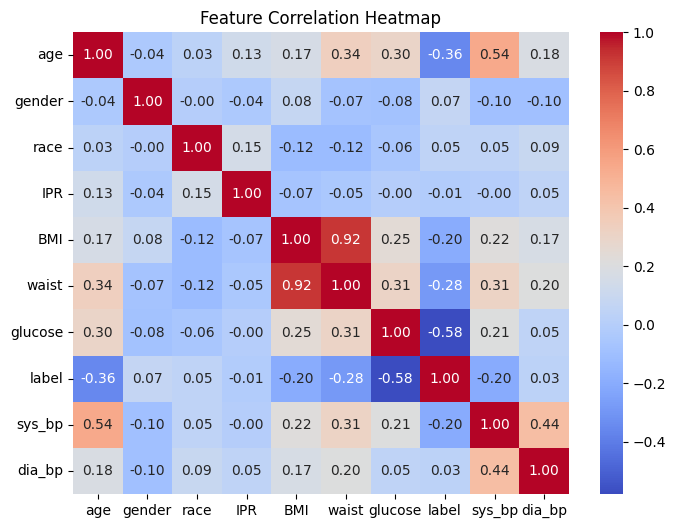

In [24]:
df = pd.DataFrame(data)

# 计算相关性矩阵
corr_matrix = df.corr()

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
val_acc_list = []
val_auc_list = []
val_recall_list = []
val_precision_list = []

models = {}
for fold in range(5):
        
    print(f"Taining Fold{fold} .....")

    tarin_data = folds[fold][0]
    val_data = folds[fold][1]
    
    train_x = tarin_data.drop(columns=['label'])
    train_y = tarin_data[["label"]]

    val_x = val_data.drop(columns=['label'])
    val_y = val_data[["label"]]

    standard_scaler = StandardScaler()
    train_x = standard_scaler.fit_transform(train_x)
    val_x = standard_scaler.transform(val_x)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    # Train the model with validation data
    model.fit(train_x, train_y)
    models[f'fold{fold}']=model
    
    # -------------------validation----------------
    y_pred_proba = model.predict(val_x)  # Get probabilities for the positive class
    y_pred = model.predict(val_x)

    accuracy = accuracy_score(val_y, y_pred)
    # print(f'Accuracy: {accuracy:.4f}')
    val_acc_list.append(accuracy)
    
    auc_score = roc_auc_score(val_y, y_pred_proba)
    # print(f'AUC Score: {auc_score:.4f}')
    val_auc_list.append(auc_score)
    
    # Print the classification report
    recall = recall_score(val_y, y_pred)
    # print(f'Recall Score: {recall:.4f}')
    val_recall_list.append(recall)
    
    precision = precision_score(val_y, y_pred)
    # print(f'AUC Score: {precision:.4f}')
    val_precision_list.append(precision)
    
    
print('Validation set')
get_results(val_acc_list,val_auc_list,val_recall_list,val_precision_list)
print('--------------------')

Taining Fold0 .....


/opt/anaconda3/envs/medical-image/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Taining Fold1 .....


/opt/anaconda3/envs/medical-image/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Taining Fold2 .....


/opt/anaconda3/envs/medical-image/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Taining Fold3 .....


/opt/anaconda3/envs/medical-image/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Taining Fold4 .....


/opt/anaconda3/envs/medical-image/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation set
Recall, Average:0.9692, Std:0.0123
precision, Average:0.9409, Std:0.0081
Accuracy, Average:0.9208, Std:0.0079
AUC, Average:0.7921, Std:0.0221
--------------------


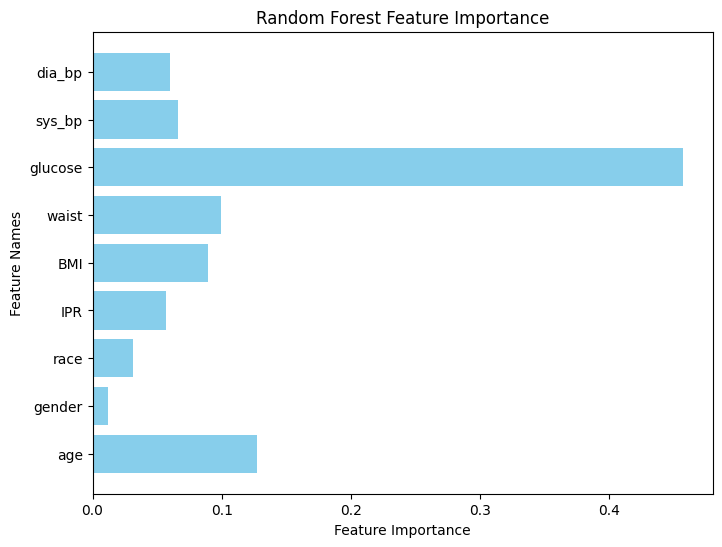

In [20]:
rf = models['fold1']
importances = rf.feature_importances_
features = data.drop(columns=['label']).columns

# 可视化特征重要性
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Random Forest Feature Importance")
plt.show()